<center><h1> Projeto de Machine Learning </h1><center>
<center><h1>Previsão de Chuvas na Austrália</h1><center>

------------------------------------------------
<center>Eduardo Selber, Henrique Badin e Luca Caruso<center>

## Preparando o ambiente

In [1]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
import os


# EDA - Exploratory Data Analysis

In [2]:
# Verificando o diretório atual
current_directory = os.getcwd()
# Listando os arquivos no diretório de dados
data_directory = os.path.join(current_directory, '..', 'data')

# Carregando o dataset
df = pd.read_csv(os.path.join(data_directory, 'weatherAUS.csv'))
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
# Gerando um relatorio de analise exploratoria
#report = sv.analyze(df)
#report.show_notebook()

### Analisando os tipos de dados das colunas do dataset e tamanho do dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Analisando os tipos de dados identificamos que os dados se dividem em **duas categorias**:
- **Categóricos** -  Identificados pelo tipo ***object**
- **Numéricos** - Identificados pelo tipo **float64**

O Dataset também conta com **145460** linhas e **23 colunas**, sendo elas:
- **Date** - A data da observação (formato: yyyy-mm-dd)
- **Location** - A localização da estação meteorológica (Nome da cidade - string)
- **MinTemp** - A temperatura mínima em graus Celsius (float)
- **MaxTemp** - A temperatura máxima em graus Celsius  (float)
- **Rainfall** - A quantidade de chuva medida em mm (float)
- **Evaporation** - A taxa de evaporação medida em mm (float)
- **Sunshine** - O número de horas de sol (float)
- **WindGustDir** - A direção da rajada de vento mais forte (string)
- **WindGustSpeed** - A velocidade (em km/h) da rajada de vento mais forte (float)
- **WindDir9am** - A direção do vento às 9am (string)
- **WindDir3pm** - A direção do vento às 3pm (string)
- **WindSpeed9am** - A velocidade do vento às 9am (em km/h) (float)
- **WindSpeed3pm** - A velocidade do vento às 3pm (em km/h) (float)
- **Humidity9am** - A umidade relativa às 9am (em %) (float)
- **Humidity3pm** - A umidade relativa às 3pm (em %) (float)
- **Pressure9am** - A pressão atmosférica reduzida ao nível do mar às 9am (em hpa) (float)
- **Pressure3pm** - A pressão atmosférica reduzida ao nível do mar às 3pm (em hpa) (float)
- **Cloud9am** - A fração de cobertura de nuvens às 9am (em oitavos) (float)
- **Cloud3pm** - A fração de cobertura de nuvens às 3pm (em oitavos) (float)
- **Temp9am** - A temperatura às 9am em graus Celsius (float)
- **Temp3pm** - A temperatura às 3pm em graus Celsius (float)
- **RainToday** - Se choveu (precipitação acima de 1mm) ou não (string)
- **RainTomorrow** - A variável alvo. Se choverá ou não amanhã (string)

### Analisando dados vazios no dataset

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Como podemos ver, com exceção da *Data* e da *Localização* todos os dados apresentam uma quantidade significativa de dados ausentes. É necessário analisar individualmente cada um deles para entender qual o tratamento apropriado

### Analisando métricas estatísticas dos dados

In [6]:
# Verificando as métricas do dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


### Visualizando a distribução dos dados
#### Variáveis Numéricas

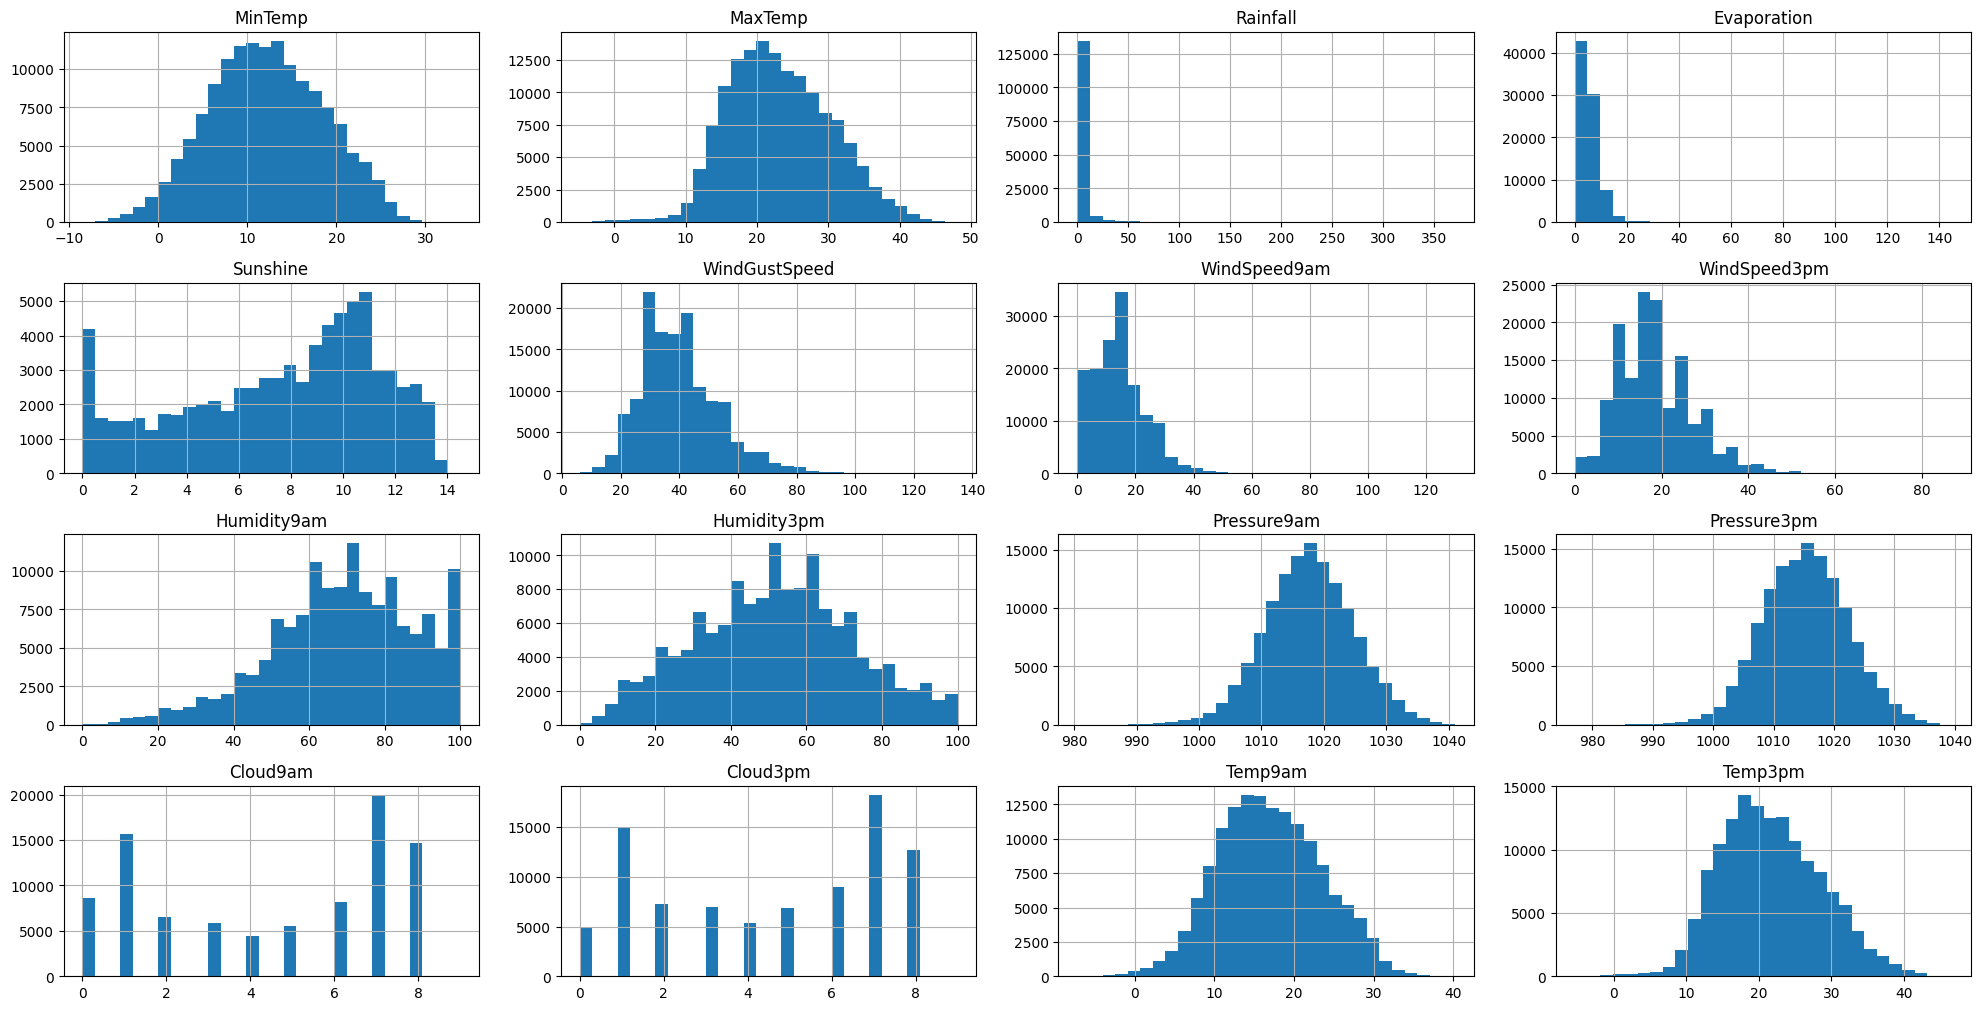

In [7]:
# Distribuição das variáveis numéricas
df.hist(bins=30, figsize=(20, 15), layout=(6, 4))
plt.tight_layout()
plt.show()

#### Variáveis Categóricas

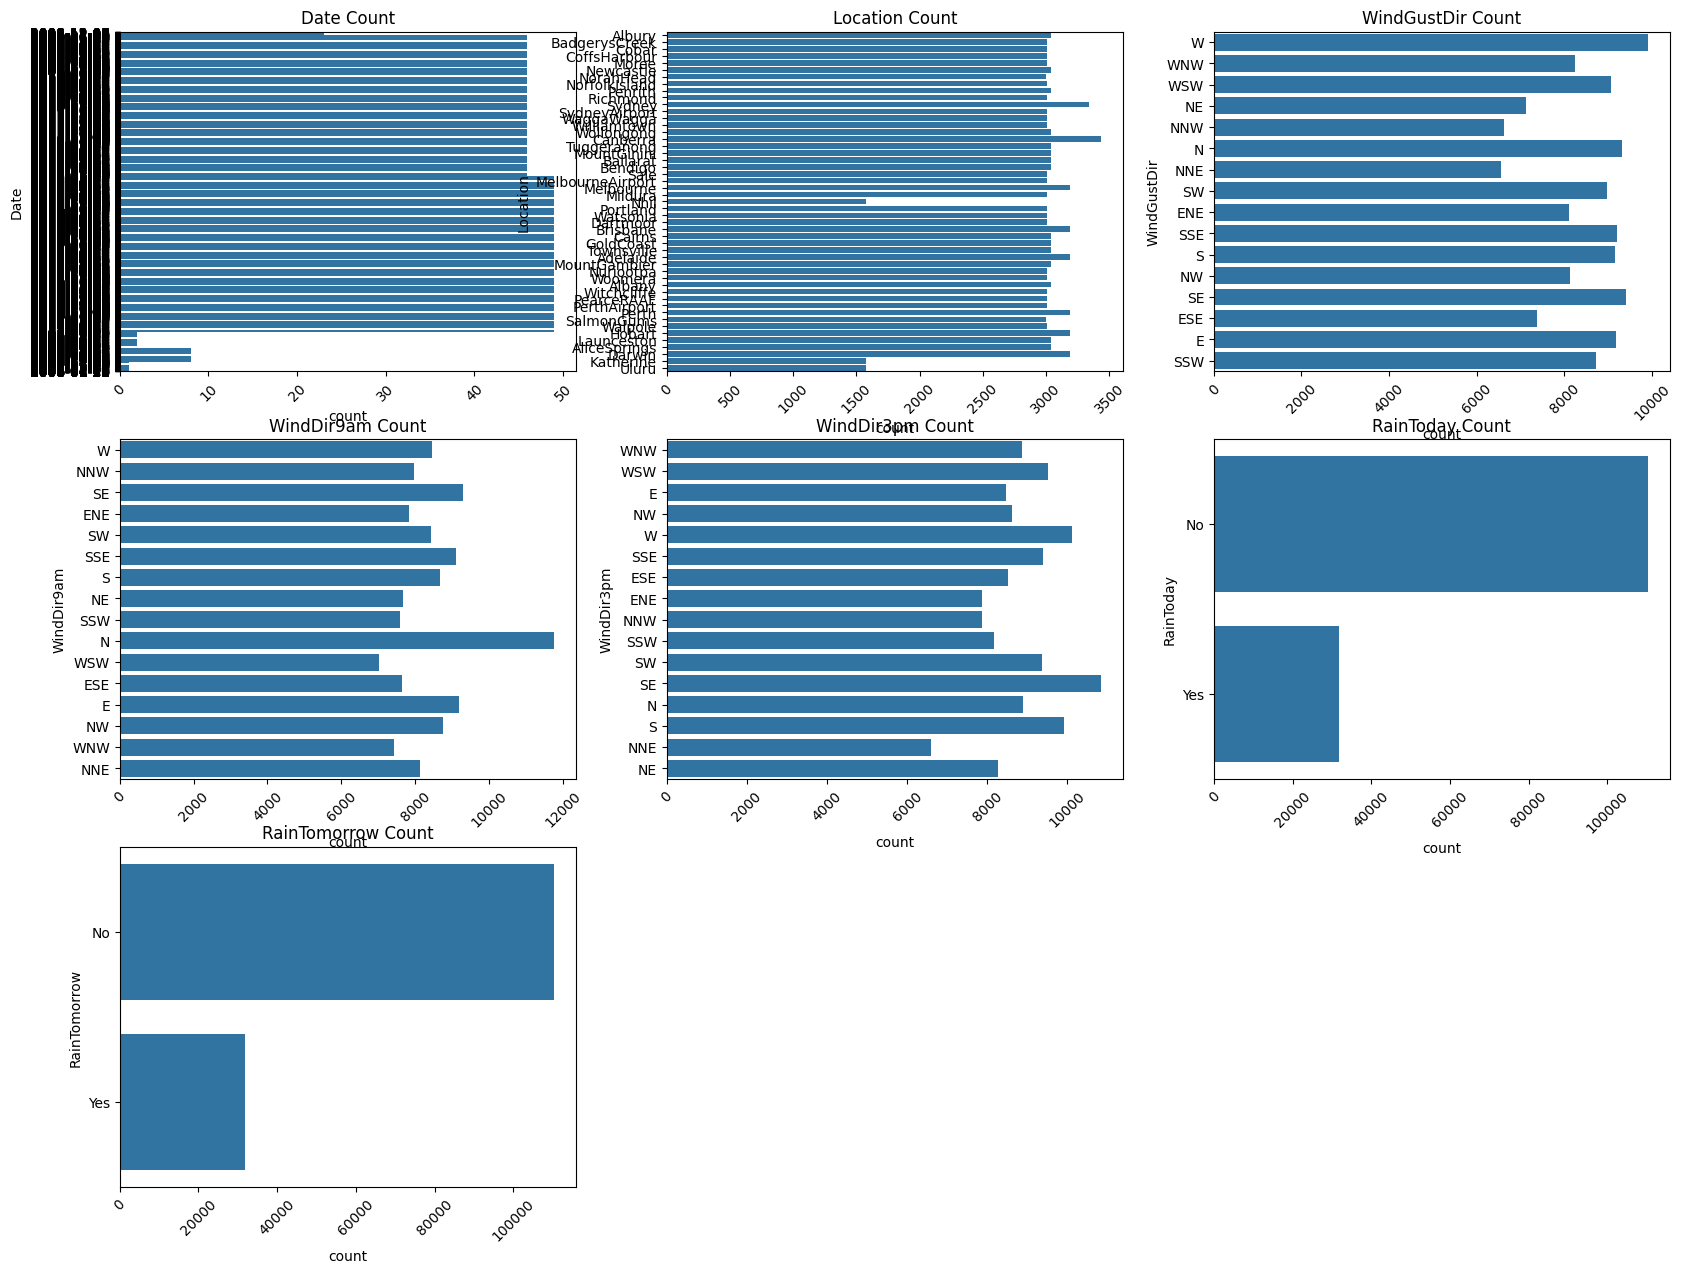

In [8]:
# Contagem das variáveis categóricas do DataFrame
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include='object').columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, y=column)
    plt.title(f'{column} Count')
    plt.xticks(rotation=45)

### Analisando as variáveis Categóricas

#### Location

In [9]:
print("Locais do Dataset: {}\n".format(df.Location.unique()))
print("Locais diferentes no Dataset: {}\n".format(df.Location.nunique()))
print("Quantidade de vezes que cada cidade aparece no Dataset: {}".format(df.Location.value_counts()))

Locais do Dataset: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

Locais diferentes no Dataset: 49

Quantidade de vezes que cada cidade aparece no Dataset: Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040


Criação de uma coluna de classificação binária, onde o valor será 1 se a zona climática da região correspondente à localização for binária, e 0 caso contrário.

![Zonas climaticas da Australia](../imgs/zonas.png)

In [ ]:
import pandas as pd
# zona_climatica_map = {
#     'Albury': 'Temperado', 'BadgerysCreek': 'Temperado', 'Cobar': 'Desértico',
#     'CoffsHarbour': 'Temperado', 'Moree': 'Desértico', 'Newcastle': 'Temperado',
#     'NorahHead': 'Temperado', 'NorfolkIsland': 'Tropical', 'Penrith': 'Temperado',
#     'Richmond': 'Temperado', 'Sydney': 'Temperado', 'SydneyAirport': 'Temperado',
#     'WaggaWagga': 'Desértico', 'Williamtown': 'Temperado', 'Wollongong': 'Temperado',
#     'Canberra': 'Temperado', 'Tuggeranong': 'Temperado', 'MountGinini': 'Montanhoso',
#     'Ballarat': 'Temperado', 'Bendigo': 'Desértico', 'Sale': 'Temperado',
#     'MelbourneAirport': 'Temperado', 'Melbourne': 'Temperado', 'Mildura': 'Desértico',
#     'Nhil': 'Desértico', 'Portland': 'Temperado', 'Watsonia': 'Temperado',
#     'Dartmoor': 'Temperado', 'Brisbane': 'Tropical', 'Cairns': 'Tropical',
#     'GoldCoast': 'Tropical', 'Townsville': 'Tropical', 'Adelaide': 'Mediterrâneo',
#     'MountGambier': 'Mediterrâneo', 'Nuriootpa': 'Mediterrâneo', 'Woomera': 'Desértico',
#     'Albany': 'Mediterrâneo', 'Witchcliffe': 'Mediterrâneo', 'PearceRAAF': 'Mediterrâneo',
#     'PerthAirport': 'Mediterrâneo', 'Perth': 'Mediterrâneo', 'SalmonGums': 'Mediterrâneo',
#     'Walpole': 'Mediterrâneo', 'Hobart': 'Temperado', 'Launceston': 'Temperado',
#     'AliceSprings': 'Desértico', 'Darwin': 'Tropical', 'Katherine': 'Tropical',
#     'Uluru': 'Desértico'
# }
# Mapeamento de localidades para a coluna binária de zona chuvosa (1 para chuvosa, 0 para não chuvosa)
zona_chuvosa_map = {
    'Albury': 0, 'BadgerysCreek': 0, 'Cobar': 0, 'CoffsHarbour': 1, 'Moree': 0, 
    'Newcastle': 1, 'NorahHead': 1, 'NorfolkIsland': 1, 'Penrith': 0, 'Richmond': 0, 
    'Sydney': 1, 'SydneyAirport': 0, 'WaggaWagga': 0, 'Williamtown': 0, 'Wollongong': 1, 
    'Canberra': 0, 'Tuggeranong': 0, 'MountGinini': 1, 'Ballarat': 0, 'Bendigo': 0, 
    'Sale': 0, 'MelbourneAirport': 0, 'Melbourne': 0, 'Mildura': 0, 'Nhil': 0, 
    'Portland': 0, 'Watsonia': 0, 'Dartmoor': 0, 'Brisbane': 1, 'Cairns': 1, 
    'GoldCoast': 1, 'Townsville': 1, 'Adelaide': 0, 'MountGambier': 0, 'Nuriootpa': 0, 
    'Woomera': 0, 'Albany': 0, 'Witchcliffe': 0, 'PearceRAAF': 0, 'PerthAirport': 0, 
    'Perth': 0, 'SalmonGums': 0, 'Walpole': 0, 'Hobart': 1, 'Launceston': 1, 
    'AliceSprings': 0, 'Darwin': 1, 'Katherine': 1, 'Uluru': 0
}

# Adicionando a coluna 'zona_chuvosa' ao DataFrame
df['zona_chuvosa'] = df['Location'].map(zona_chuvosa_map)

# Exibindo as primeiras linhas do DataFrame após a alteração
print(df.head())


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1   

#### WindGustDir

In [11]:
print("Direções do Dataset: {}\n".format(df.WindGustDir.unique()))
print("Direções diferentes no Dataset: {}\n".format(df.WindGustDir.nunique()))
print("Quantidade de vezes que cada direção aparece no Dataset: {}".format(df.WindGustDir.value_counts()))

Direções do Dataset: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']

Direções diferentes no Dataset: 16

Quantidade de vezes que cada direção aparece no Dataset: WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64


### Visualizando Outliers

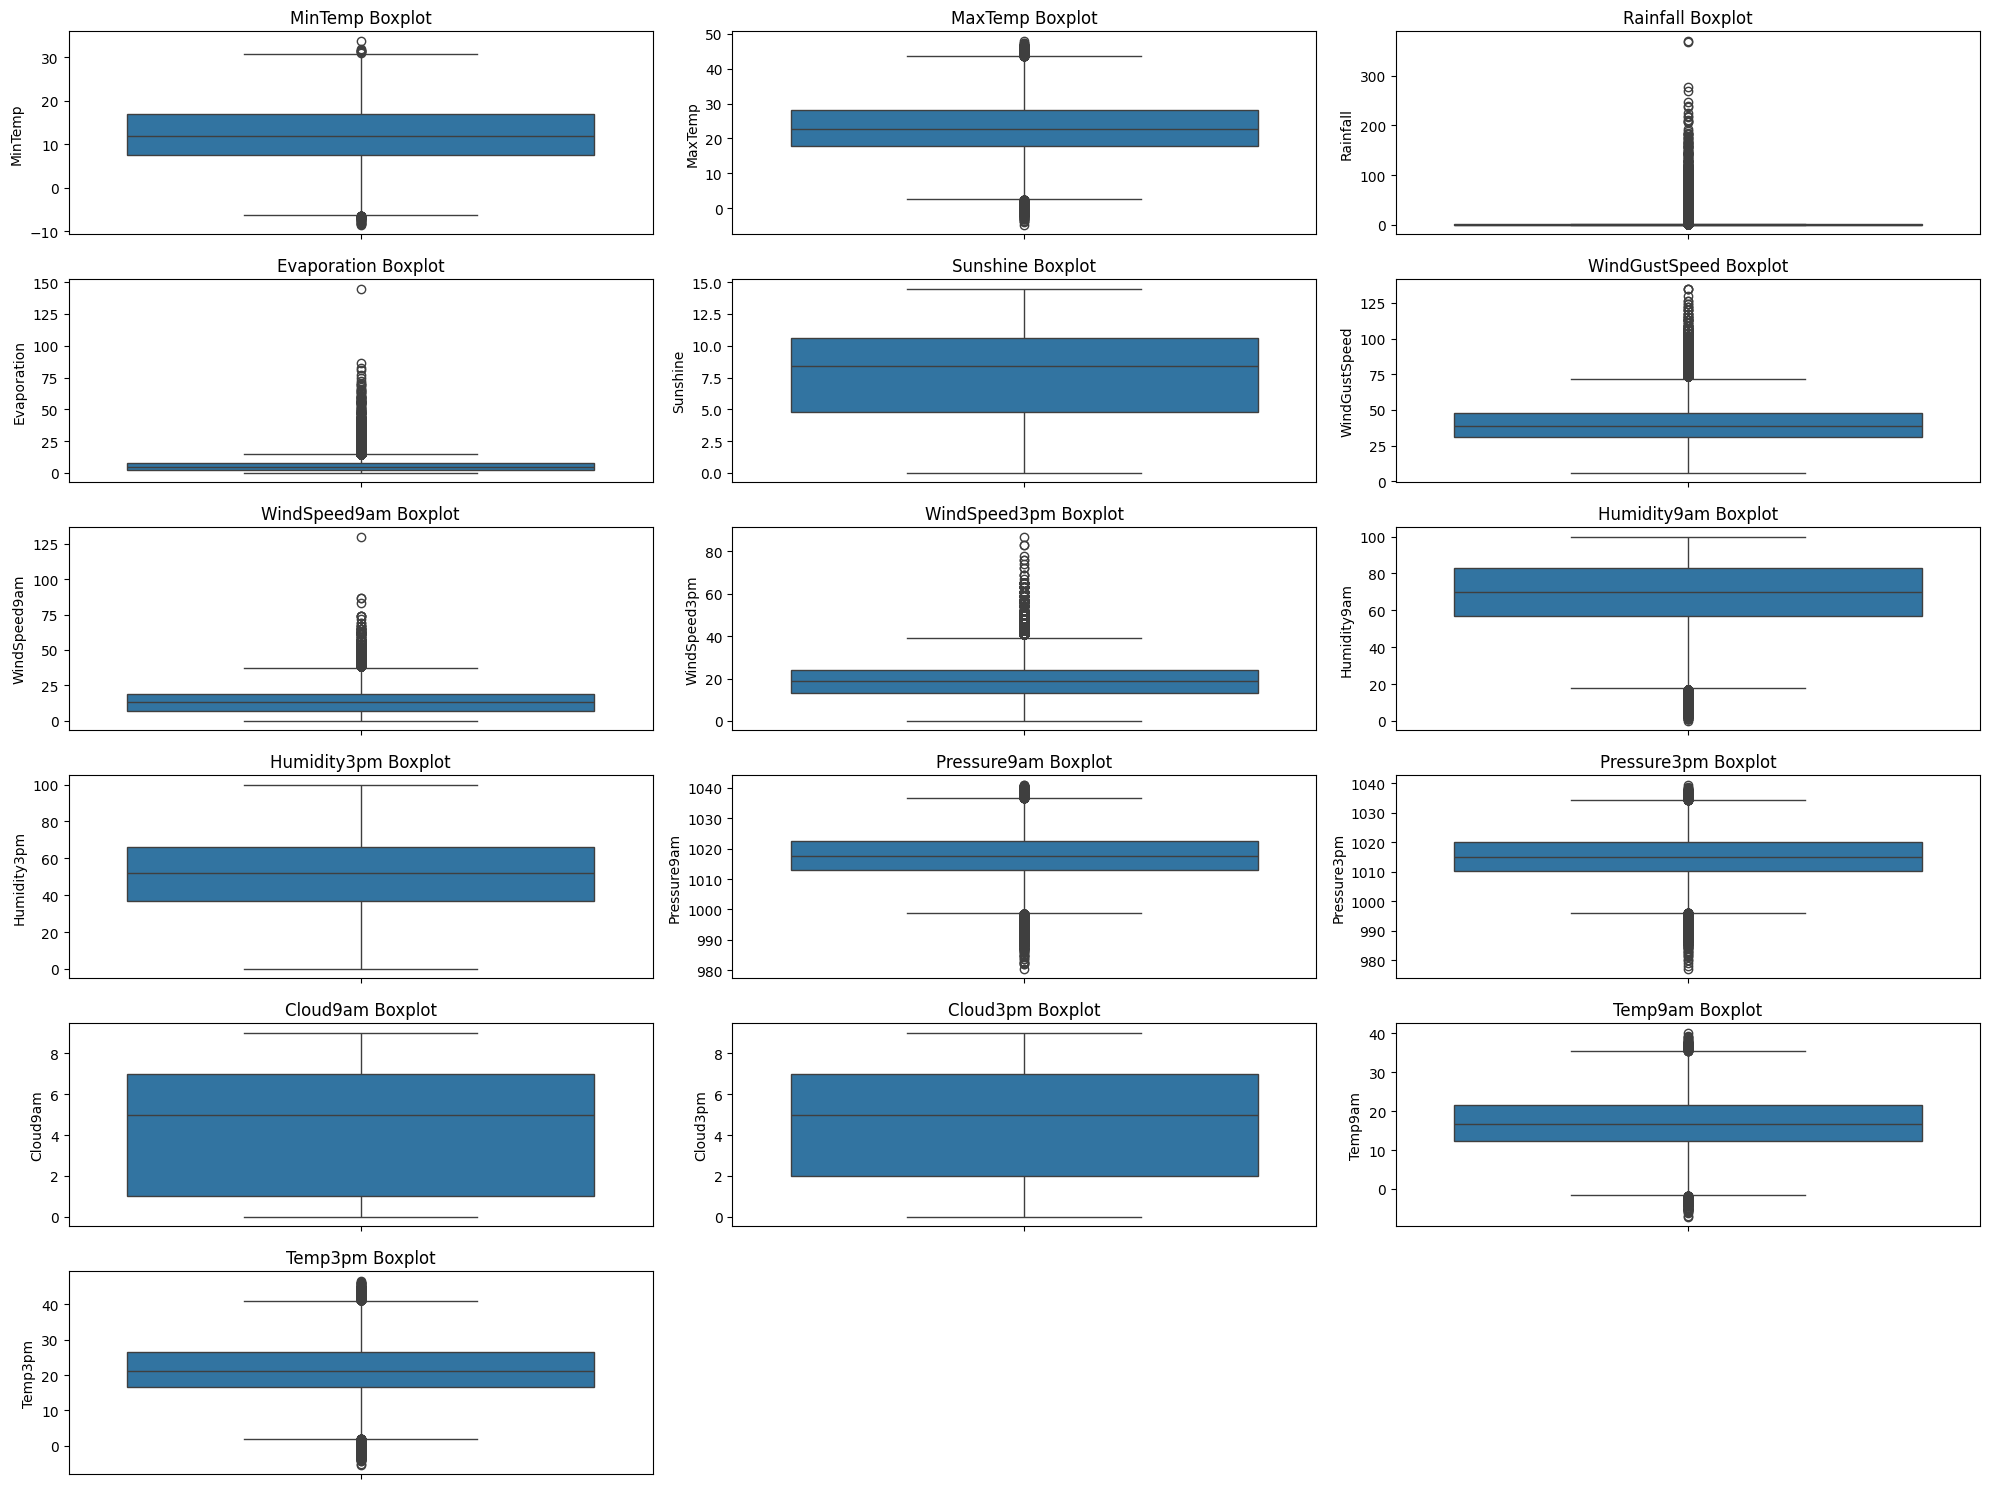

In [12]:
plt.figure(figsize=(20, 15))
num_columns = len(df.select_dtypes(include='float64').columns)
rows = (num_columns // 3) + 1

for i, column in enumerate(df.select_dtypes(include='float64').columns, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

## Data Wrangling
Primeiro vamos formatar os dados da base de dados para prepará-lo para o modelo preditivo

## Tratamento dos dados vazios
### Dados Numéricos

In [13]:
#Visualizando as colunas numericas do dataset
numerical = [i for i in df.columns if df[i].dtype=='float64']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

Para fazer o tratamento das colunas **MinTemp**, **MaxTemp**, **Humidity9am**, **Humidity3pm**, **Pressure9am**, **Pressure3pm**, **Temp9am**, **Temp3pm**, vamos substituir os dados ausentes pela média, uma vez que os dados apresentam uma distribuição normal.

In [14]:
#Substituindo os valores nulos pela média da coluna das colunas MinTemp, MaxTemp, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

Para as colunas **Rainfall**, **Evaporation**, **Sunshine**, **WindGustSpeed**, **WindSpeed9am**, **WindSpeed3pm** vamos substituir os valores nulos pela mediana da coluna, já que os dados destes apresentam uma distribuição assimétrica

In [15]:
#Substituindo os valores nulos pela mediana da coluna das colunas WindGustSpeed, WindSpeed9am, WindSpeed3pm, Evaporation, Sunshine e Rainfall
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].median())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())

Por fim, para as colunas **Cloud9am** e **Cloud3pm**, vamos substituir os valores vazios pela moda, uma vez que seus dados se apresentam discretos

In [16]:
#Substituindo os valores nulos pela moda da coluna das colunas cloud9am e cloud3pm
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mode()[0])
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0])

### Dados Categóricos

As **Localizações** não apresentam dados vazios e portanto não precisam de tratamento. 
Para as colunas **WindGustDir**, **WindDir9am**, **WindDir3pm**, **RainToday** e **RainTomorrow** vamos substituir os valores vazios pelo valor mais frequente

In [17]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

C:\Users\pichau\AppData\Local\Temp\ipykernel_22740\3401736357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
C:\Users\pichau\AppData\Local\Temp\ipykernel_22740\3401736357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

Feito este tratamento, não deve haver mais dados vazios no dataset

In [18]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
zona_chuvosa     0
dtype: int64

Agora que não há mais dados ausentes, podemos ajustar os dados para que eles possam ser usados nos modelos preditivos.
A primeira coisa a ser feita é o mapeamento de colunas categóricas binárias (Sim e Não) para os valores 1 e 0 respectivamente.
Isso deverá ser feito nas colunas **RainToday** e **RainTomorrow**


In [19]:
# #Tratamento de variaveis categoricas 
df["RainToday"] = df["RainToday"].map({"Yes":1, "No":0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

Além disso, para as demais colunas categóricas precisamos codificar os dados.
Podemos começar separando as datas em 3 colunas numéricas representando **Dia**, **Mês** e **Ano** 

In [20]:
#df['Date'] = pd.to_datetime(df['Date'])
#df = df.sort_values(by='Date')

#df['Day'] = df['Date'].dt.day
#df['Month'] = df['Date'].dt.month
#df['Year'] = df['Date'].dt.year

df.drop('Date', axis=1, inplace=True)  #Não precisamos mais da coluna Date uma vez que já extraímos as informações dela para outras colunas e o dataset está ordenado por data

Para as demais colunas categóricas vamos codificar usando a função **Label Encoder** do sklearn que transforma os valores categóricos em um número inteiro que representa aquele valor categorico

In [21]:
le =  LabelEncoder()
for i in df:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])
    else:
        continue

Agora que todos os dados foram formatados, como podemos ver abaixo, não há mais o tipo *object* dentre as colunas

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int32  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int32  
 9   WindDir3pm     145460 non-null  int32  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

Agora que não temos mais dados categóricos, podemos analisar a correlação entre as variáveis

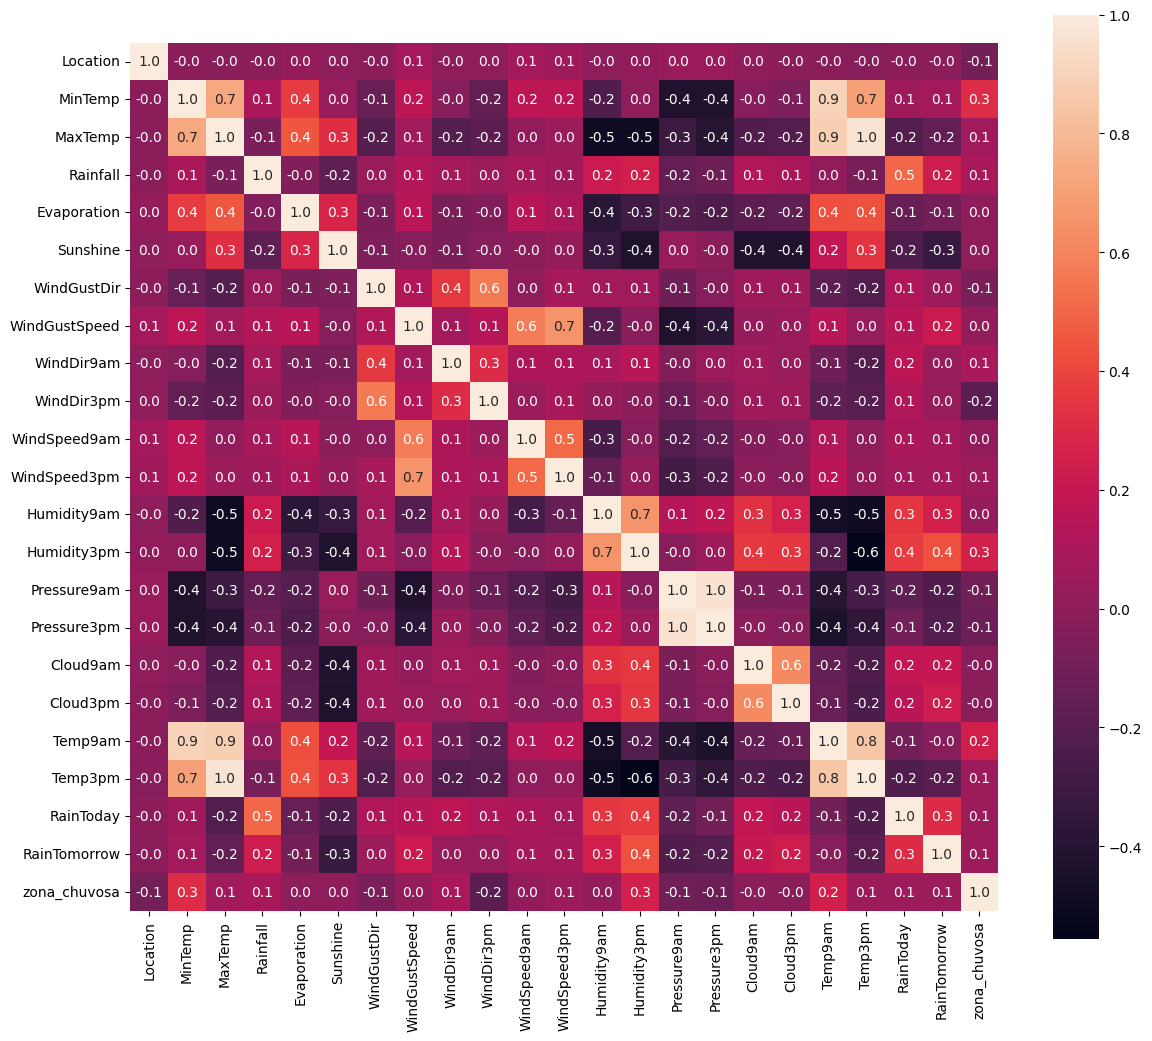

In [23]:
corr = df.corr()
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.1f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

## Dividindo o Dataset em Test e Train

Como vimos nos histogramas da analise exploratória, o nosso target não está balanceado.
Por isso, a primeira coisa que devemos fazer é o balanceamento de choveu e não choveu das colunas **RainToday** e **RainTomorrow**, para que isso não gere um viés na nossa predição

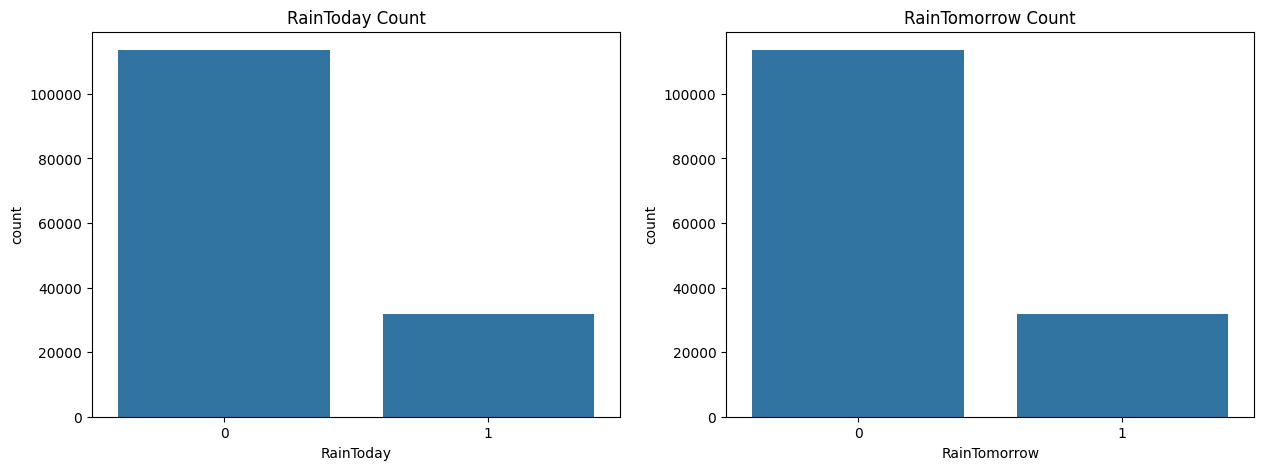

In [24]:
#Distrubuição das colunas RainToday e RainTomorrow
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)    
sns.countplot(data=df, x='RainToday')
plt.title('RainToday Count')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='RainTomorrow')
plt.title('RainTomorrow Count')
plt.show()

In [25]:
dataset = df.copy()
target = dataset["RainTomorrow"]
features = dataset.drop(["RainTomorrow"], axis=1)

Para fazer o balanceamento das classes, vamos usar a técnica de oversampling **SMOTE** (Synthetic Minority Over Sampling Technique), que cria novas instâncias da classe minoritária a partir das instâncias já existentes, combinada com a técnica de **undersampling**, que remove instâncias da classe majoritária, podemos balancear as classes do dataset.

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#x_res, y_res = smk.fit_resample(features, target)
x_res = features
y_res = target

# Separando o DataFrame em treino, teste e validação
n = len(df)
train_end = int(0.6 * n)
test_end = int(0.8 * n)


# Dividindo os dados em treino (60%) e o restante (40% para teste + validação)
x_train, x_remainder, y_train, y_remainder = train_test_split(
    x_res, y_res, test_size=0.4, random_state=42
)

# Dividindo o restante (40%) em teste (20%) e validação (20%)
x_test, x_val, y_test, y_val = train_test_split(
    x_remainder, y_remainder, test_size=0.5, random_state=42
)

# Verificando os tamanhos finais
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape


x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape


((87276, 22), (87276,), (29092, 22), (29092,), (29092, 22), (29092,))

In [27]:
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,zona_chuvosa
135527,17,12.8,27.1,0.0,4.8,8.4,7,39.0,6,7,...,71.0,35.0,1017.64994,1015.255889,7.0,7.0,19.0,25.9,0,1
8964,10,21.6,36.0,0.0,4.8,8.4,0,39.0,0,5,...,74.0,34.0,1013.50000,1010.600000,7.0,3.0,24.1,33.9,0,0
43166,47,10.4,16.4,0.0,4.8,8.4,13,61.0,15,15,...,56.0,50.0,1001.30000,1002.000000,7.0,8.0,12.6,14.8,0,1
135408,17,1.4,13.9,0.0,4.8,8.4,7,28.0,3,7,...,89.0,69.0,1017.64994,1015.255889,7.0,8.0,8.2,12.8,0,1
32775,37,12.6,19.4,0.4,1.4,0.7,13,24.0,13,6,...,88.0,57.0,1034.60000,1031.500000,7.0,6.0,13.5,19.2,0,1


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
model = LogisticRegression(max_iter=10000, tol=1e-5)
model.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=10000, tol=1e-05)

In [29]:
y_pred = model.predict(scaler.transform(x_test))


In [30]:
accuracy_score(y_test, y_pred)

0.845077684586828

In [31]:
pd.Series(y_test).value_counts(normalize=True)

RainTomorrow
0    0.775918
1    0.224082
Name: proportion, dtype: float64

In [32]:
pd.Series(y_val).value_counts(normalize=True)

RainTomorrow
0    0.780627
1    0.219373
Name: proportion, dtype: float64

In [33]:
y_val_pred = model.predict(scaler.transform(x_val))


In [34]:
accuracy_score(y_val, y_val_pred)

0.8455245428296438

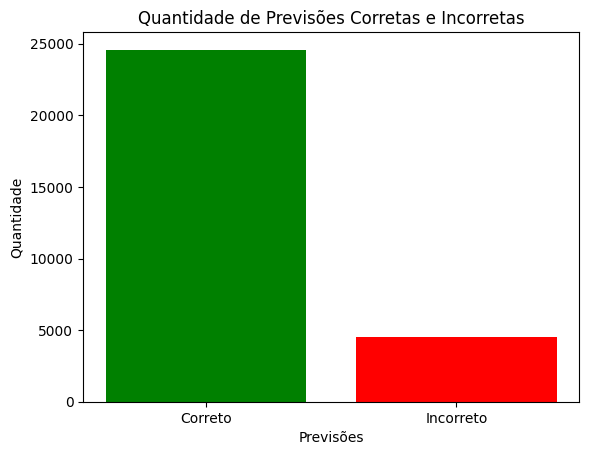

Acurácia: 84.50776845868279%


In [35]:
import matplotlib.pyplot as plt

# Contagem de corretos e incorretos
certo = 0
total = 0
for i in range(len(y_pred)):
    #print(f'Previsão: {y_pred[i]} - Real: {y_test.iloc[i]}')
    if y_pred[i] == y_test.iloc[i]:
        certo += 1
    total += 1

errado = total - certo

# Dados para o gráfico
labels = ['Correto', 'Incorreto']
values = [certo, errado]

# Criando o gráfico de barras
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Previsões')
plt.ylabel('Quantidade')
plt.title('Quantidade de Previsões Corretas e Incorretas')
plt.show()
print(f'Acurácia: {certo/total*100}%')

In [36]:
y_val_pred = model.predict(scaler.transform(x_val))


In [37]:
#Calculando a acurácia
accuracy_score(y_val, y_val_pred)

0.8455245428296438

In [38]:
pd.Series(y_val).value_counts(normalize=True)

RainTomorrow
0    0.780627
1    0.219373
Name: proportion, dtype: float64

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler  # Biblioteca para balanceamento

# Reamostragem da classe minoritária
ros = RandomOverSampler(sampling_strategy='minority')
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Modelos a serem testados
modelos = {
    "RandomForest_balanced": RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced"),
    "GradientBoosting_balanced": GradientBoostingClassifier(n_estimators=100),
    "LogisticRegression_balanced": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Pipeline para os modelos
pipeline_base = Pipeline([
    ("scaler", StandardScaler())
])

# Função para treinar e avaliar os modelos
def treinar_e_avaliar(modelo, x_train, y_train, x_val, y_val):
    # Definir o pipeline completo com o modelo atual
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", modelo)
    ])
    
    # Treinamento e predição
    pipeline.fit(x_train, y_train)
    y_val_pred = pipeline.predict(x_val)
    
    # Avaliar as métricas
    print("Matriz de Confusão:")
    print(confusion_matrix(y_val, y_val_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_val, y_val_pred))
    print("\nAcurácia:", accuracy_score(y_val, y_val_pred))

# Treinar e avaliar cada modelo
for nome, modelo in modelos.items():
    print(f"\nModelo: {nome}")
    treinar_e_avaliar(modelo, x_resampled, y_resampled, x_val, y_val)



Modelo: RandomForest_balanced
Matriz de Confusão:
[[18480  4230]
 [ 1611  4771]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     22710
           1       0.53      0.75      0.62      6382

    accuracy                           0.80     29092
   macro avg       0.72      0.78      0.74     29092
weighted avg       0.83      0.80      0.81     29092


Acurácia: 0.7992231541317201

Modelo: GradientBoosting_balanced
Matriz de Confusão:
[[18042  4668]
 [ 1460  4922]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85     22710
           1       0.51      0.77      0.62      6382

    accuracy                           0.79     29092
   macro avg       0.72      0.78      0.74     29092
weighted avg       0.83      0.79      0.80     29092


Acurácia: 0.7893578990787845

Modelo: LogisticRegression_balanced
Matriz de Confusão:
[[1

Após analisar os scores de acurácia, o modelo de regressão logística, que não foi balanceado, apresentou o melhor desempenho.